In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('c:/Users/Professor/Downloads/Train.csv', sep = ',', parse_dates = ['host_since'], error_bad_lines = False, index_col = 'host_since')

In [4]:
df.price = df.price.str.extract('(\d+)', expand = False) # extract only digits 

In [461]:
df.head(3)

,name,summary,description,neighborhood_overview,transit,host_location,host_about,host_response_rate,host_acceptance_rate,host_neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
host_since,,,,,,,,,,,,,,,,,,,,,
2013-08-14,Guest Quarters on Capitol Hill,The Guest Quarters on Capitol Hill is a garde...,The Guest Quarters on Capitol Hill is a garde...,the convenience and charm of being on Capitol ...,The Red Line and the Blue Line Metros are with...,"Washington, District of Columbia, United States",We are a reservation service for many DC area ...,98%,52%,LeDroit Park,...,10.0,10.0,10.0,10.0,10.0,8.0,f,strict,41,0.18
2012-01-23,Private oasis. Top floor w/ 2 decks,"Top two floors, two bathrooms and two decks. M...","Top two floors, two bathrooms and two decks. M...",Adams Morgan is the most vibrant part of DC wh...,There is so many transportation options. Acros...,"Washington, District of Columbia, United States","I have lived in DC for that past five years, b...",100%,100%,Adams Morgan,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,1,0.41
2009-10-31,People's Place -Convention Center,NaN,This 2 bedroom apartment is on the ground floo...,NaN,NaN,"Berkeley, California, United States",A professional photo editor and photographer l...,97%,100%,Bedford-Stuyvesant,...,8.0,8.0,9.0,9.0,9.0,9.0,f,strict,3,1.09


In [462]:
df.shape

(3013, 44)

In [5]:
df_c = df.dropna(axis = 1, how = 'any') # удалить столбец, если хотя бы одно значение пусто

In [6]:
df_c = df_c.dropna(axis = 0, how = 'any') # удалить строку, если хотя бы одно значение пусто

In [115]:
# non_numberic_profits = df.price.str.contains('[^0-9.-]')
# df.loc[non_numberic_profits].head(3)
# set(df.price[non_numberic_profits])

In [503]:
df_c.shape

(3013, 21)

In [466]:
df_c.head(4)

,name,host_verifications,neighbourhood_cleansed,city,state,market,smart_location,country_code,country,room_type,...,bed_type,amenities,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,calculated_host_listings_count
host_since,,,,,,,,,,,,,,,,,,,,,
2013-08-14,Guest Quarters on Capitol Hill,"['email', 'phone', 'reviews', 'kba']","Union Station, Stanton Park, Kingman Park",Washington,DC,D.C.,"Washington, DC",US,United States,Entire home/apt,...,Real Bed,{},195,2,3,90,2,f,strict,41
2012-01-23,Private oasis. Top floor w/ 2 decks,"['email', 'phone', 'facebook', 'reviews', 'kba']","Kalorama Heights, Adams Morgan, Lanier Heights",Washington,DC,D.C.,"Washington, DC",US,United States,Entire home/apt,...,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",150,2,2,1125,2,f,strict,1
2009-10-31,People's Place -Convention Center,"['email', 'phone', 'facebook', 'linkedin', 're...","Shaw, Logan Circle",Washington,DC,D.C.,"Washington, DC",US,United States,Entire home/apt,...,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",140,4,4,90,53,f,strict,3
2013-04-23,M St Apt C,"['email', 'phone', 'facebook', 'linkedin', 're...","Shaw, Logan Circle",Washington,DC,D.C.,"Washington, DC",US,United States,Entire home/apt,...,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",110,0,2,1125,32,f,flexible,4


In [338]:
df_c.columns

Index(['name', 'host_since', 'host_verifications', 'neighbourhood_cleansed',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'room_type', 'accommodates', 'bed_type', 'amenities', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count'],
      dtype='object')

In [467]:
df_c.dtypes

name                              object
host_verifications                object
neighbourhood_cleansed            object
city                              object
state                             object
market                            object
smart_location                    object
country_code                      object
country                           object
room_type                         object
accommodates                       int64
bed_type                          object
amenities                         object
price                             object
guests_included                    int64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
instant_bookable                  object
cancellation_policy               object
calculated_host_listings_count     int64
dtype: object

In [339]:
df_c['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate', 'super_strict_30'], dtype=object)

In [139]:
df_c['city'].unique(), df_c['state'].unique(), df_c['market'].unique(), df_c['smart_location'].unique(), df_c['country_code'].unique(), df_c['country'].unique()

(array(['Washington', 'Washington, D.C.', 'Silver Spring', 'Mount Rainier',
        'New York', 'Columbia Heights, middle of DC!', 'Washington ',
        'Arlington', 'Takoma Park', 'Dupont Circle', 'Annapolis',
        'Hyattsville', 'Capitol Hill, Washington', 'Adams Morgan'],
       dtype=object),
 array(['DC', 'MD', 'NY', 'VA', 'Washington DC'], dtype=object),
 array(['D.C.'], dtype=object),
 array(['Washington, DC', 'Washington, D.C., DC', 'Silver Spring, MD',
        'Mount Rainier, MD', 'New York, NY',
        'Columbia Heights, middle of DC!, DC', 'Washington , DC',
        'Arlington, VA', 'Takoma Park, MD', 'Dupont Circle, DC',
        'Annapolis, MD', 'Hyattsville, MD', 'Capitol Hill, Washington, DC',
        'Adams Morgan, Washington DC'], dtype=object),
 array(['US'], dtype=object),
 array(['United States'], dtype=object))

In [7]:
for_dropp = ['name', 'host_verifications', 'neighbourhood_cleansed', 'market', 'smart_location', 'country_code', 'country', 'room_type', 'bed_type', 'amenities', 'instant_bookable']
df_c.drop(for_dropp, inplace = True, axis = 1)

In [8]:
df_c.shape, df_c.dtypes

((3013, 10),
 city                              object
 state                             object
 accommodates                       int64
 price                             object
 guests_included                    int64
 minimum_nights                     int64
 maximum_nights                     int64
 number_of_reviews                  int64
 cancellation_policy               object
 calculated_host_listings_count     int64
 dtype: object)

In [505]:
df_c.head(4)

,city,state,accommodates,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,calculated_host_listings_count
host_since,,,,,,,,,,
2013-08-14,Washington,DC,4,195,2,3,90,2,strict,41
2012-01-23,Washington,DC,2,150,2,2,1125,2,strict,1
2009-10-31,Washington,DC,6,140,4,4,90,53,strict,3
2013-04-23,Washington,DC,3,110,0,2,1125,32,flexible,4


In [9]:
# checking for unique of all columns

list = df_c.columns
k = 0
for i in list:
    if df_c[i].is_unique == False: k += 1
if k == len(df_c.columns) :
    print("All", k, "-th columns have no unique values")

All 10 -th columns have no unique values


In [372]:
df_c.dtypes;

In [10]:
df_c['price'] = pd.to_numeric(df_c['price'])

In [11]:
# checking how values we can missed
from numpy import unique

list1 = df_c.columns
k = 0
for i in list1:
    if df_c[i].dtypes != "int64" : list1 = list1.drop(i)
for i in list1:
    if df_c[i].isnull().sum() / len(df_c) == 0: k += 1
if k == len(list1) :
    print("All", k, "-th int columns have no missed values")

All 7 -th int columns have no missed values


In [509]:
df_c.resample('M')['price'].mean()

host_since
2008-08-31     99.000000
2008-09-30    274.000000
2008-10-31    115.000000
2008-11-30    114.444444
2008-12-31    137.111111
                 ...    
2015-06-30    111.409091
2015-07-31    131.130000
2015-08-31    144.744681
2015-09-30    181.808333
2015-10-31    121.333333
Freq: M, Name: price, Length: 87, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


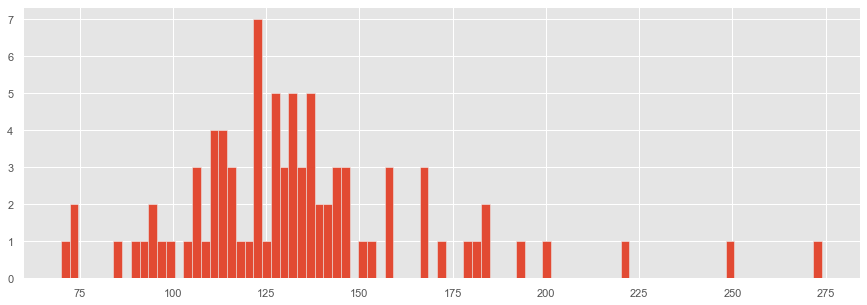

In [12]:
plt.hist(df_c.resample('M')['price'].mean(), bins = len(df_c.resample('M')['price'].mean()))
plt.show()

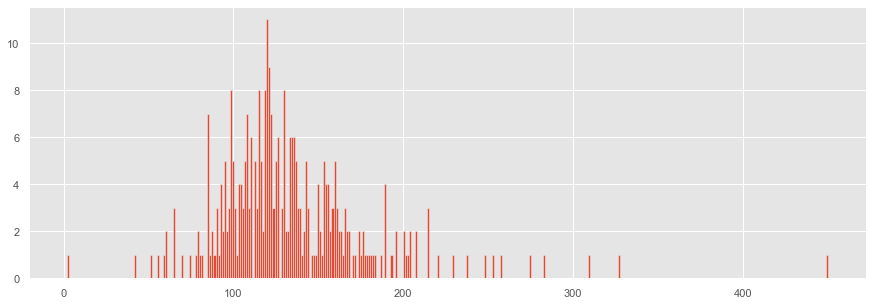

In [511]:
plt.hist(df_c.resample('W')['price'].mean(), bins = len(df_c.resample('W')['price'].mean()))
plt.show()

In [13]:
# Categorical boolean mask
# cat_mask = df_c.dtypes==object # filter categorical columns using mask and turn it into a list
cat_cols = df_c.columns[df_c.dtypes==object].tolist()
print(cat_cols)

# import labelencoder
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_c[cat_cols] = df_c[cat_cols].apply(lambda col: le.fit_transform(col))
df_c[cat_cols].head(3)

['city', 'state', 'cancellation_policy']


,city,state,cancellation_policy
host_since,,,
2013-08-14,11,0,2
2012-01-23,11,0,2
2009-10-31,11,0,2


In [513]:
df_c.dtypes

city                              int32
state                             int32
accommodates                      int64
price                             int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
cancellation_policy               int32
calculated_host_listings_count    int64
dtype: object

In [14]:
counts = df_c.nunique() # summarize the number of unique values in each column
# record columns to delete, if it's equal to one values
for_delete = [i for i,v in enumerate(counts) if v == 1]
print(for_delete)
# drop useless columns
df_c.drop(for_delete, axis = 1, inplace = True)
print(df_c.shape)
print("Number of unique values for each column and percent")
for i in range(df_c.shape[1]):
    num = len(unique(df_c.iloc[:, i]))
    percentage = float(num) / df_c.shape[0] * 100
    print('%d, %d, %.1f%%' % (i, num, percentage))

[]
(3013, 10)
Number of unique values for each column and percent
0, 14, 0.5%
1, 5, 0.2%
2, 16, 0.5%
3, 262, 8.7%
4, 14, 0.5%
5, 17, 0.6%
6, 90, 3.0%
7, 156, 5.2%
8, 4, 0.1%
9, 18, 0.6%


In [515]:
df_c.columns

Index(['city', 'state', 'accommodates', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'cancellation_policy', 'calculated_host_listings_count'],
      dtype='object')

In [15]:
n_order = ['city', 'state', 'accommodates', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'calculated_host_listings_count', 'price']
df_c = df_c.reindex(columns = n_order)

In [517]:
df_c.describe()

,city,state,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,calculated_host_listings_count,price
count,3013.000000,3013.000000,3013.000000,3013.00000,3013.000000,3.013000e+03,3013.000000,3013.000000,3013.000000,3013.000000
mean,11.002655,0.008961,3.201792,1.62164,2.257883,7.168688e+05,15.304016,0.997013,3.204779,141.513110
std,0.515361,0.124595,2.030912,1.35016,3.912753,3.912318e+07,30.152179,0.870609,6.188674,99.190235
min,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,11.000000,0.000000,2.000000,1.00000,1.000000,1.200000e+02,1.000000,0.000000,1.000000,85.000000
50%,11.000000,0.000000,2.000000,1.00000,2.000000,1.125000e+03,4.000000,1.000000,1.000000,115.000000
75%,11.000000,0.000000,4.000000,2.00000,3.000000,1.125000e+03,16.000000,2.000000,2.000000,165.000000
max,13.000000,4.000000,16.000000,16.00000,180.000000,2.147484e+09,362.000000,3.000000,41.000000,900.000000


In [563]:
df_c.columns

Index(['city', 'state', 'accommodates', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'cancellation_policy',
       'calculated_host_listings_count', 'price'],
      dtype='object')

In [562]:
df_c.dtypes

city                              int32
state                             int32
accommodates                      int64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
cancellation_policy               int32
calculated_host_listings_count    int64
price                             int64
dtype: object

In [586]:
df_c.iloc[:, 9:10]

,price
host_since,
2013-08-14,195
2012-01-23,150
2009-10-31,140
2013-04-23,110
2012-07-09,119
...,...
2013-11-27,129
2014-05-10,99
2015-07-27,69


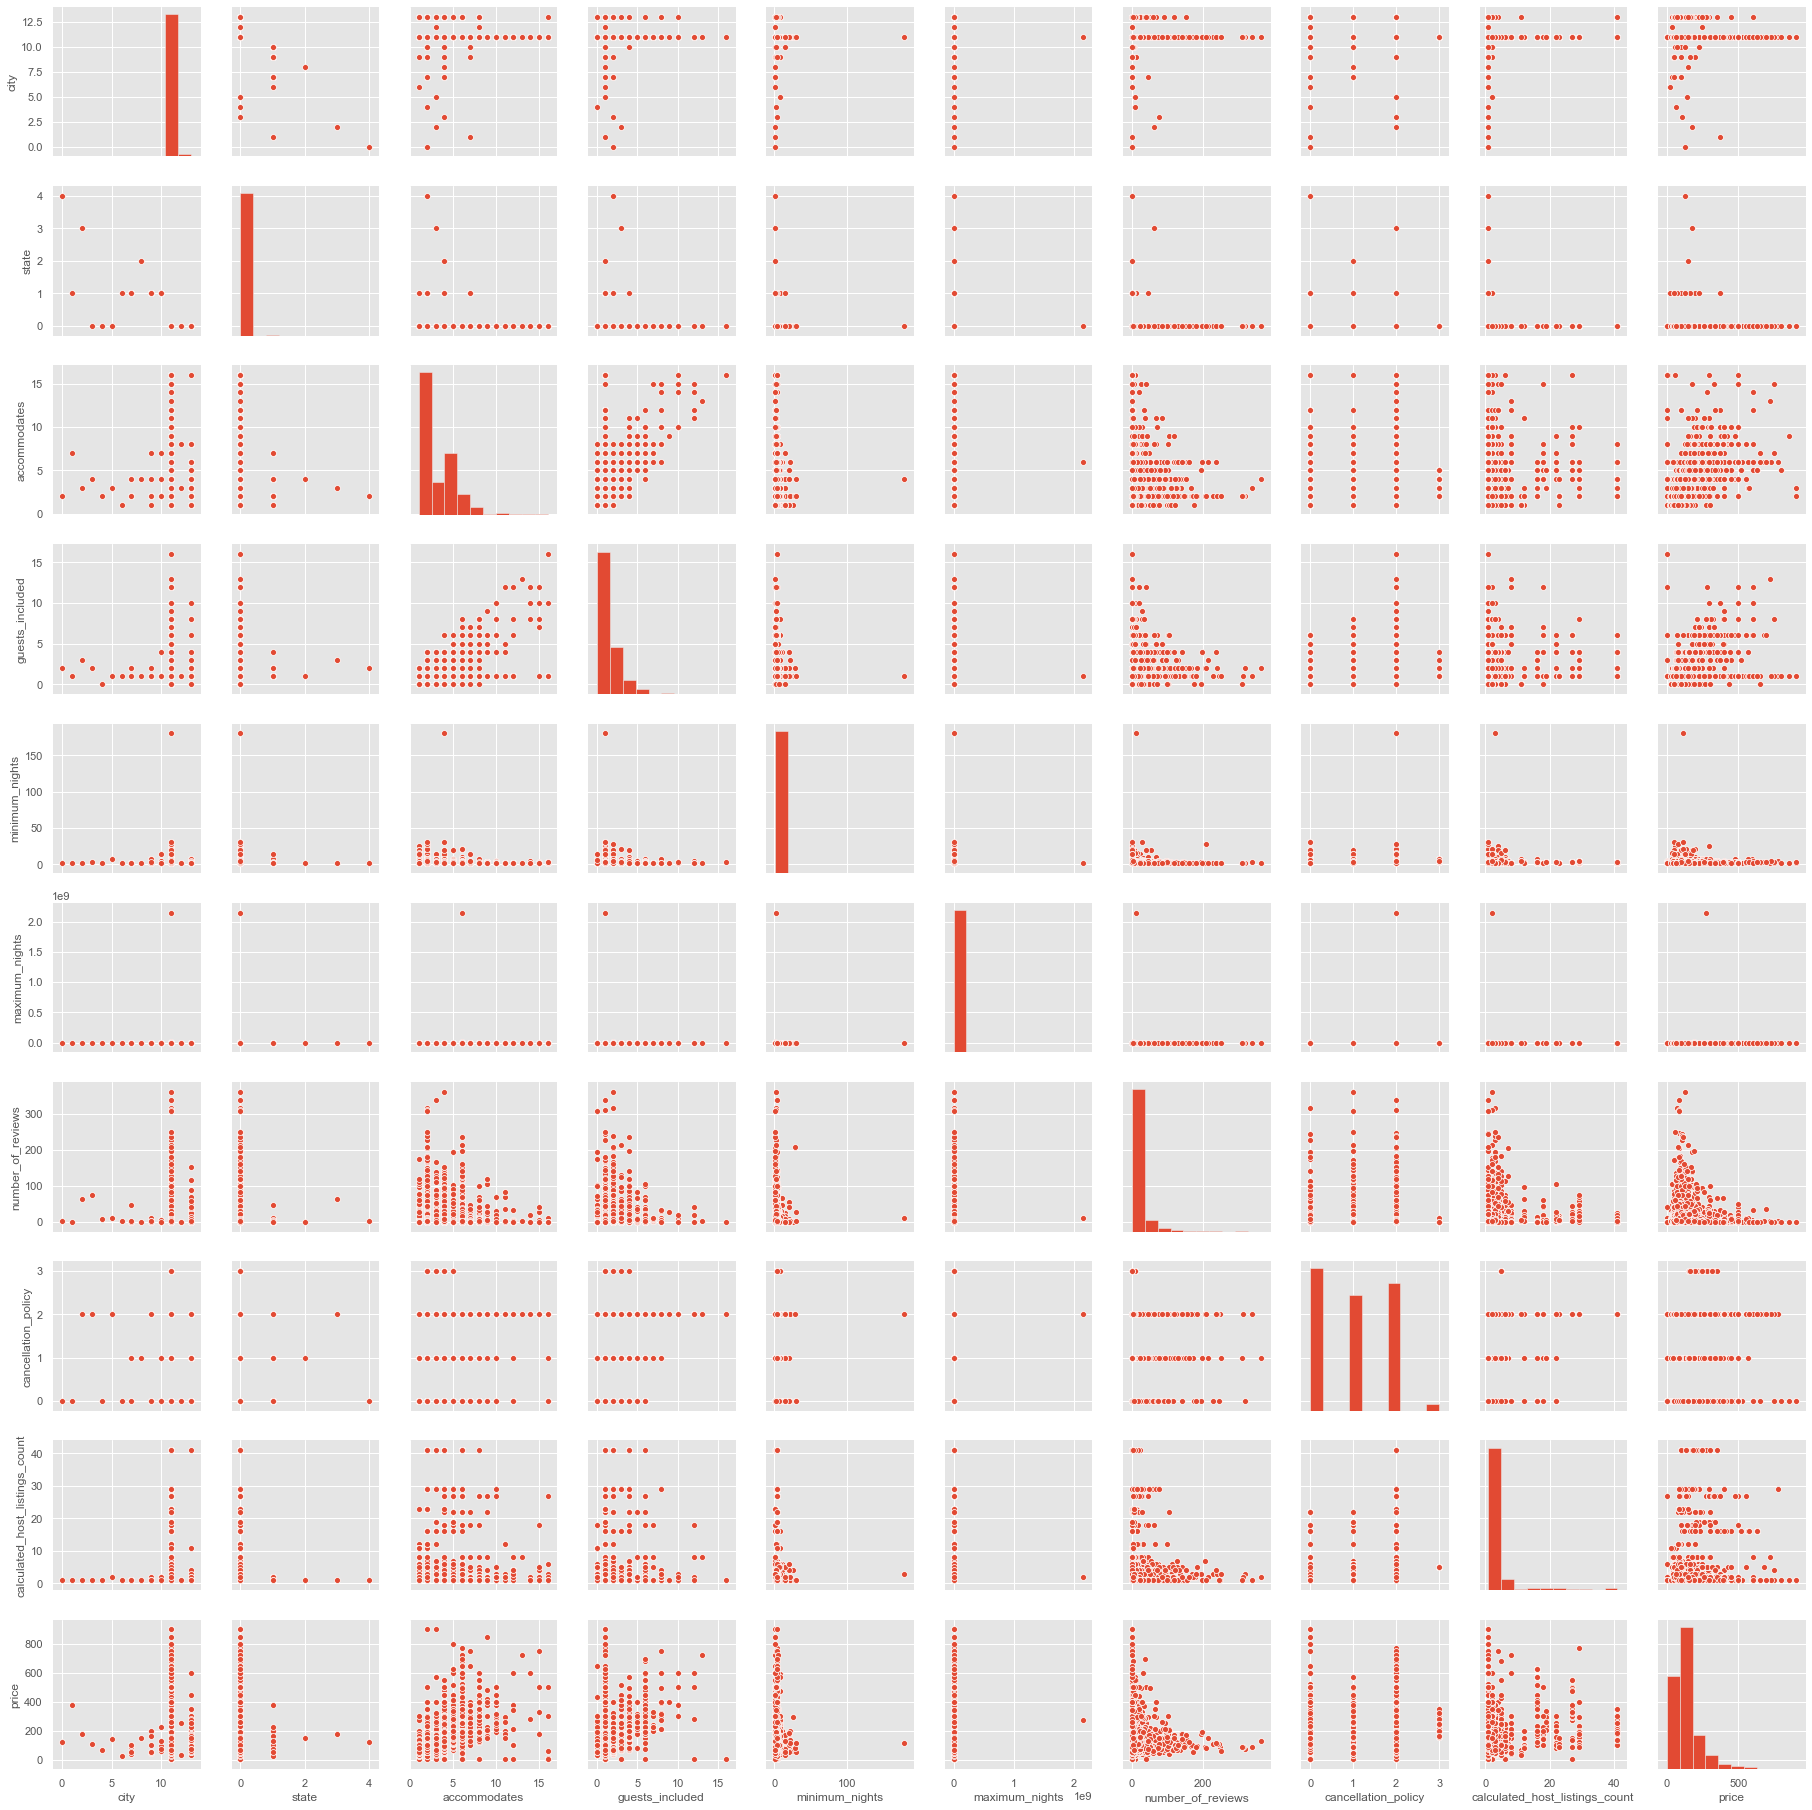

In [548]:
sns.pairplot(df_c)

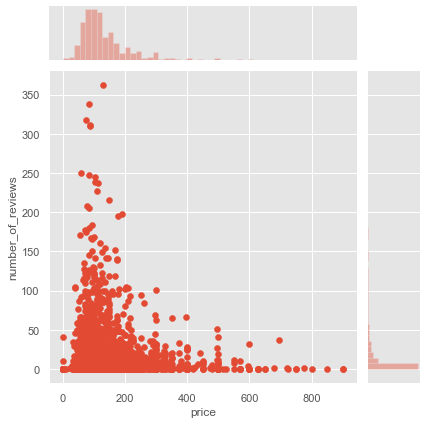

In [546]:
df_t = pd.DataFrame(df_c, columns = ["price", "number_of_reviews"])
sns.jointplot(x = "price", y = "number_of_reviews", data = df_t) # kind = "hex"

In [566]:
df_c['cancellation_policy'].nunique

<bound method IndexOpsMixin.nunique of host_since
2013-08-14    2
2012-01-23    2
2009-10-31    2
2013-04-23    0
2012-07-09    1
             ..
2013-11-27    2
2014-05-10    2
2015-07-27    2
2013-10-14    1
2014-10-21    2
Name: cancellation_policy, Length: 3013, dtype: int32>

In [16]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(df_c.iloc[:, :-1])

# transform training data
df_cn = norm.transform(df_c.iloc[:, :-1])


In [629]:
df_cn.shape, df_c.shape, df_c1.shape

((3013, 9), (3013, 10), (3013, 9))

In [17]:
df_c1 = pd.DataFrame(df_cn, columns = ['city', 'state', 'accommodates', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'calculated_host_listings_count'])
# df_c1['price'] = pd.DataFrame(df_cn, columns = ['price'])
df_c1.head()

,city,state,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,calculated_host_listings_count
0,0.846154,0.0,0.200000,0.125,0.011173,4.144385e-08,0.005525,0.666667,1.000
1,0.846154,0.0,0.066667,0.125,0.005587,5.234033e-07,0.005525,0.666667,0.000
2,0.846154,0.0,0.333333,0.250,0.016760,4.144385e-08,0.146409,0.666667,0.050
3,0.846154,0.0,0.133333,0.000,0.005587,5.234033e-07,0.088398,0.000000,0.075
4,0.846154,0.0,0.066667,0.000,0.016760,6.053597e-09,0.008287,0.333333,0.050


In [18]:
df_c1.index = df_c.index

In [19]:
df_c1['price'] = df_c['price']
# ignore_index = True, copy = True, 
# join = 'outer', names = ['city', 'state', 'accommodates', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'cancellation_policy', 'calculated_host_listings_count', 'price']
# result = pd.merge(df_c1, df_c['price'], how = 'right')
df_c1.head(3)

,city,state,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,calculated_host_listings_count,price
host_since,,,,,,,,,,
2013-08-14,0.846154,0.0,0.200000,0.125,0.011173,4.144385e-08,0.005525,0.666667,1.00,195
2012-01-23,0.846154,0.0,0.066667,0.125,0.005587,5.234033e-07,0.005525,0.666667,0.00,150
2009-10-31,0.846154,0.0,0.333333,0.250,0.016760,4.144385e-08,0.146409,0.666667,0.05,140


In [666]:
df_c1.describe()

,city,state,accommodates,guests_included,minimum_nights,maximum_nights,number_of_reviews,cancellation_policy,calculated_host_listings_count,price
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3.013000e+03,3013.000000,3013.000000,3013.000000,3013.000000
mean,0.846358,0.002240,0.146786,0.101352,0.007027,3.338176e-04,0.042276,0.332338,0.055119,141.513110
std,0.039643,0.031149,0.135394,0.084385,0.021859,1.821815e-02,0.083293,0.290203,0.154717,99.190235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,0.846154,0.000000,0.066667,0.062500,0.000000,5.541369e-08,0.002762,0.000000,0.000000,85.000000
50%,0.846154,0.000000,0.066667,0.062500,0.005587,5.234033e-07,0.011050,0.333333,0.000000,115.000000
75%,0.846154,0.000000,0.200000,0.125000,0.011173,5.234033e-07,0.044199,0.666667,0.025000,165.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,900.000000


In [21]:
df_c1.iloc[:, :-1];

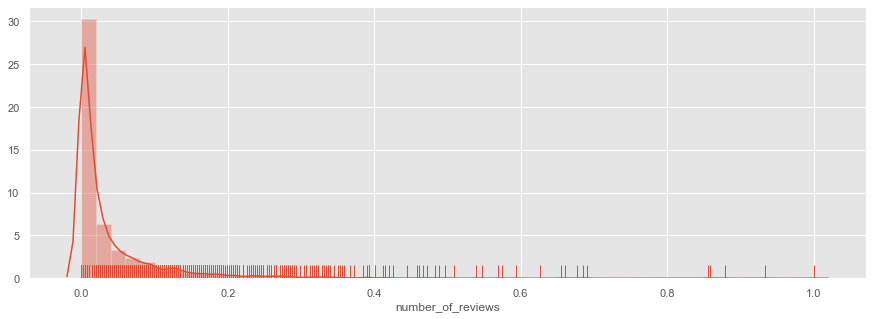

In [667]:
sns.distplot(df_c1['number_of_reviews'], kde = True, rug = True)

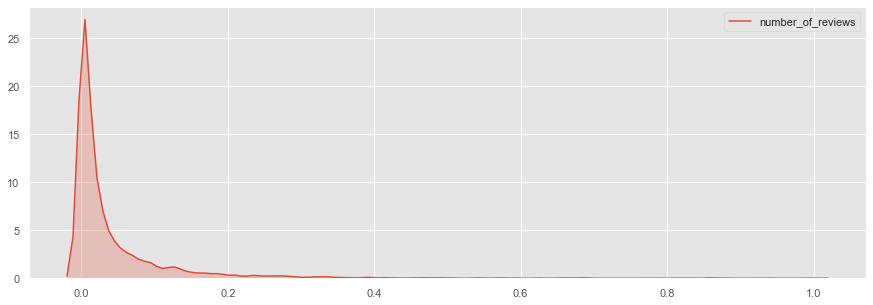

In [668]:
sns.kdeplot(df_c1['number_of_reviews'], shade = True)

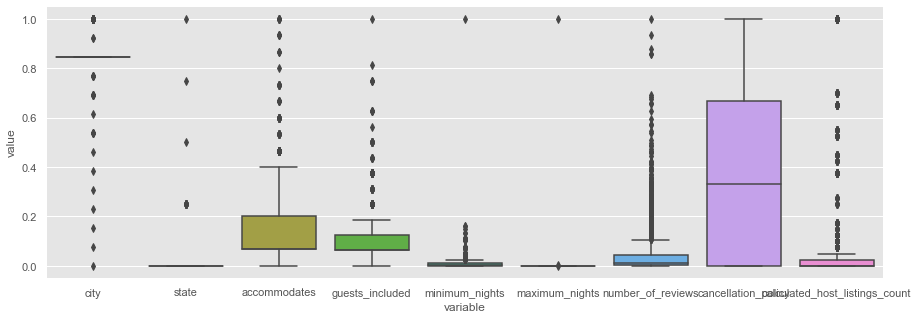

In [22]:
sns.boxplot(x = "variable", y = "value", data = pd.melt(df_c1.iloc[:, :-1]))

plt.show()

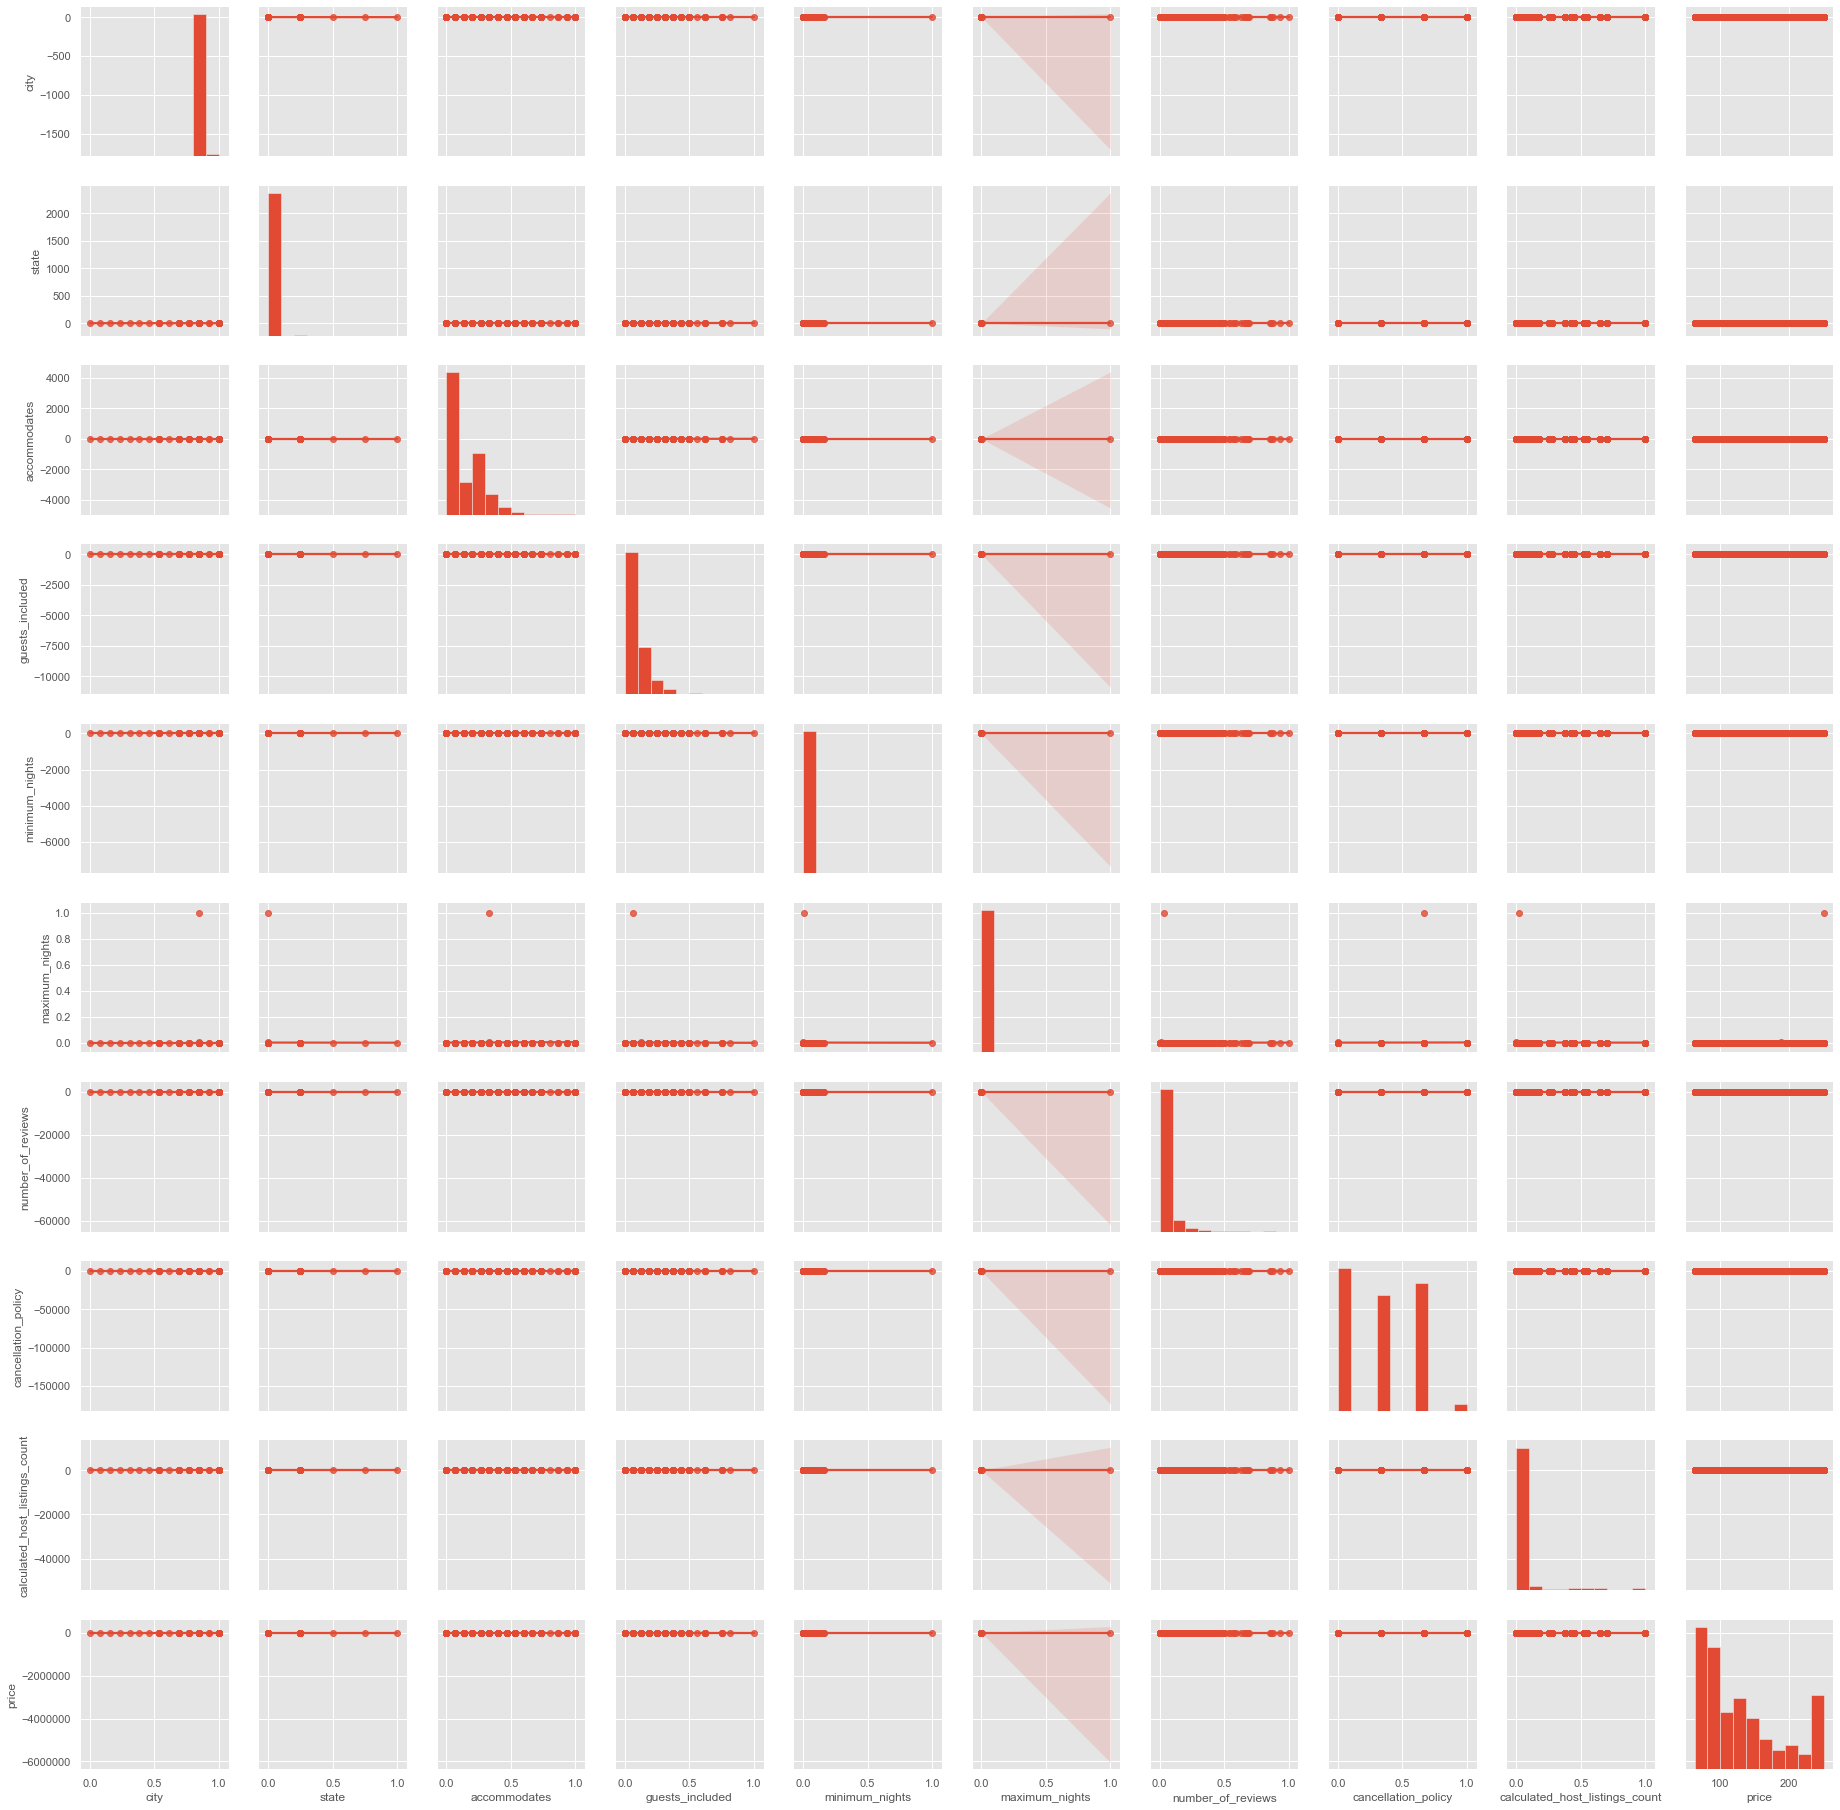

In [687]:
sns.pairplot(df_c1, kind = "reg") # show correlogram with regression

In [23]:
# calculate duplicates
dups = df_c1.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df_c1[dups])

True
                city  state  accommodates  guests_included  minimum_nights  \
host_since                                                                   
2009-07-10  0.846154    0.0      0.066667           0.0625        0.016760   
2013-04-29  0.846154    0.0      0.066667           0.0625        0.000000   
2015-09-21  0.846154    0.0      0.066667           0.0625        0.000000   
2013-10-14  0.846154    0.0      0.266667           0.0625        0.011173   
2015-07-08  0.846154    0.0      0.066667           0.0625        0.000000   
...              ...    ...           ...              ...             ...   
2010-10-17  0.846154    0.0      0.066667           0.0625        0.000000   
2015-08-05  0.846154    0.0      0.200000           0.0625        0.005587   
2014-03-06  0.846154    0.0      0.066667           0.0625        0.000000   
2014-05-26  0.846154    0.0      0.200000           0.0625        0.000000   
2013-10-14  0.846154    0.0      0.133333           0.0625 

In [24]:
# df_c1.isnull().sum() # Checking for missing values

# Calculate total number of cells in dataframe
totalCells = np.product(df_c1.shape)

# Count number of missing values per column
missingCount = df_c1.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The dataset contains 0.0 % missing values.


In [680]:
df_c1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3013 entries, 2013-08-14 to 2014-10-21
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            3013 non-null   float64
 1   state                           3013 non-null   float64
 2   accommodates                    3013 non-null   float64
 3   guests_included                 3013 non-null   float64
 4   minimum_nights                  3013 non-null   float64
 5   maximum_nights                  3013 non-null   float64
 6   number_of_reviews               3013 non-null   float64
 7   cancellation_policy             3013 non-null   float64
 8   calculated_host_listings_count  3013 non-null   float64
 9   price                           3013 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 338.9 KB


In [25]:
df_c1['price'].skew() # skewness value (assimetric coef), ideally, the skewness value should be between -1 and 1

2.6945847331341204

In [26]:
print(df_c1['price'].quantile(0.10)) # 10th and 90th percentile of the variable, 'price'
print(df_c1['price'].quantile(0.90))

63.0
250.0


In [27]:
# Now we will execute the outlier removal, which is done in the lines of code below.
# The skewness value is now much better.
# It's one of way for outlier removal

df_c1["price"] = np.where(df_c1["price"] < 63.0, 63.0, df_c1['price'])
df_c1["price"] = np.where(df_c1["price"] > 250.0, 250.0, df_c1['price'])
print(df_c1['price'].skew())

0.8291885442186132


In [186]:
min(df_c['host_since']), max(df_c['host_since'])

(Timestamp('2008-08-08 00:00:00'), Timestamp('2015-10-01 00:00:00'))

In [187]:
min(df_c['host_since'].dt.year), max(df_c['host_since'].dt.year)

(2008, 2015)

In [66]:
DSA = df_c1["price"]

In [689]:
DSA.index

DatetimeIndex(['2013-08-14', '2012-01-23', '2009-10-31', '2013-04-23',
               '2012-07-09', '2012-06-26', '2015-07-27', '2013-10-25',
               '2014-11-11', '2014-09-15',
               ...
               '2015-02-18', '2013-10-28', '2014-11-20', '2011-05-16',
               '2013-03-31', '2013-11-27', '2014-05-10', '2015-07-27',
               '2013-10-14', '2014-10-21'],
              dtype='datetime64[ns]', name='host_since', length=3013, freq=None)

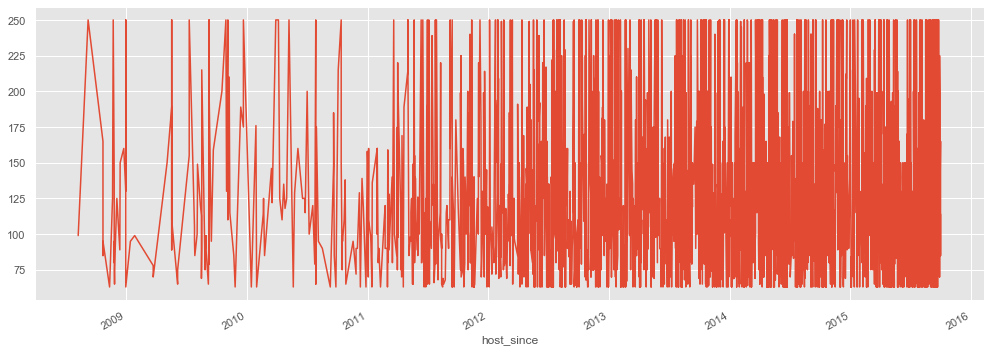

In [690]:
DSA.plot(figsize = (17, 6))
plt.show()

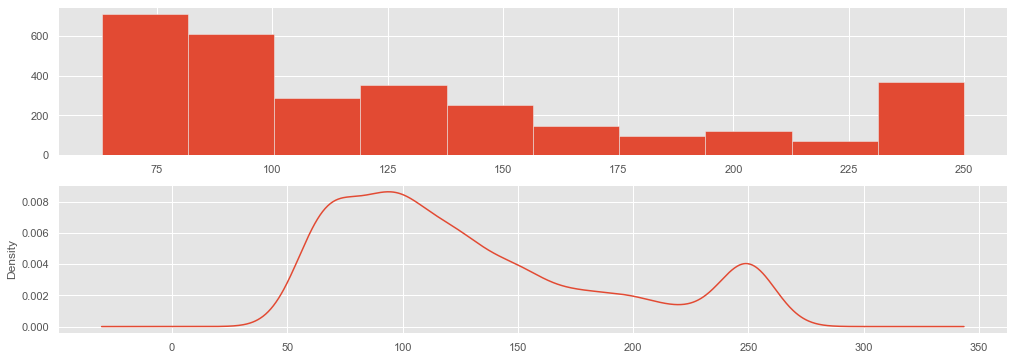

In [691]:
plt.figure(1, figsize = (17, 6))
plt.subplot(211)
DSA.hist()
plt.subplot(212)
DSA.plot(kind = 'kde')
plt.show()

In [ ]:
# Time Series forecasting using Facebook's Prophet

In [29]:
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [ ]:
# !pip install fbprophet

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import numpy as np
import random
import statsmodels.api as sm
# prophet by Facebook
from fbprophet import Prophet
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

Creates time series features from Date column

In [67]:
DSA = DSA.reset_index()

In [68]:
DSA.info() #, df_c1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   host_since  3013 non-null   datetime64[ns]
 1   price       3013 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.2 KB


In [69]:
def date_features(DSA, label = None):
    DSA = DSA.copy()

    DSA['Date'] = DSA.host_since
    DSA['Month'] = DSA['Date'].dt.strftime('%B')
    DSA['Year'] = DSA['Date'].dt.strftime('%Y')
    DSA['Dayofweek'] = DSA['Date'].dt.strftime('%A')
    DSA['Quarter'] = DSA['Date'].dt.quarter
    DSA['Dayofyear'] = DSA['Date'].dt.dayofyear
    DSA['Dayofmonth'] = DSA['Date'].dt.day
    DSA['Weekofyear'] = DSA['Date'].dt.weekofyear
    
    X = DSA[['Dayofweek','Quarter','Month','Year',
           'Dayofyear','Dayofmonth','Weekofyear']]
    if label:
        y = DSA[label]
        return X, y
    return X
X, y = date_features(DSA, label = 'price')
df_new = pd.concat([X, y], axis = 1)
df_new.head()

,Dayofweek,Quarter,Month,Year,Dayofyear,Dayofmonth,Weekofyear,price
0,Wednesday,3,August,2013,226,14,33,195.0
1,Monday,1,January,2012,23,23,4,150.0
2,Saturday,4,October,2009,304,31,44,140.0
3,Tuesday,2,April,2013,113,23,17,110.0
4,Monday,3,July,2012,191,9,28,119.0


Plotting the Features to see trends. Number has strong daily and seasonal properties. Day of week also seems to show differences in peaks

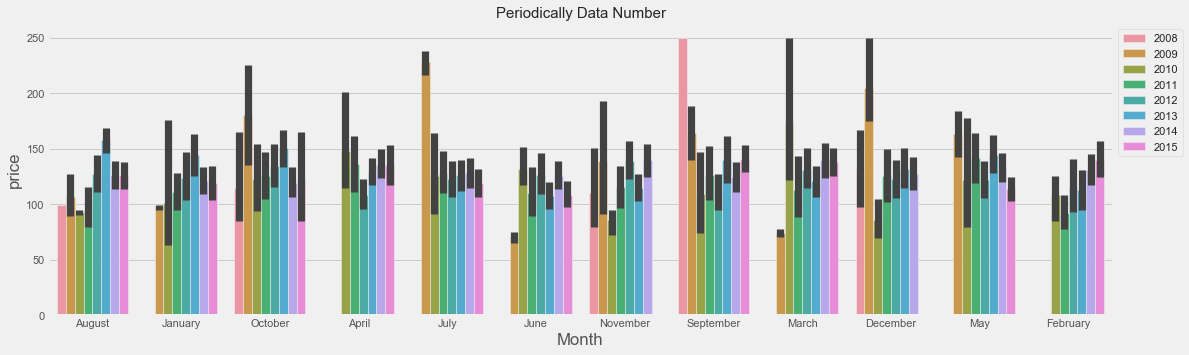

In [71]:
fig, ax = plt.subplots(figsize = (17, 5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x = "Month", y = "price", hue = 'Year', data = df_new)
a.set_title("Periodically Data Number", fontsize = 15)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper')
plt.show()

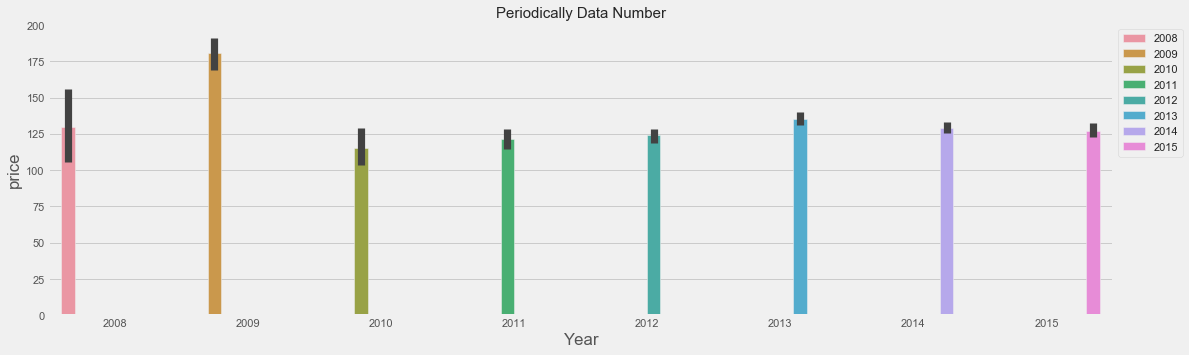

In [72]:
fig, ax = plt.subplots(figsize = (17, 5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x = "Year", y = "price", hue = 'Year', data = df_new)
a.set_title("Periodically Data Number", fontsize = 15)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper')
plt.show()

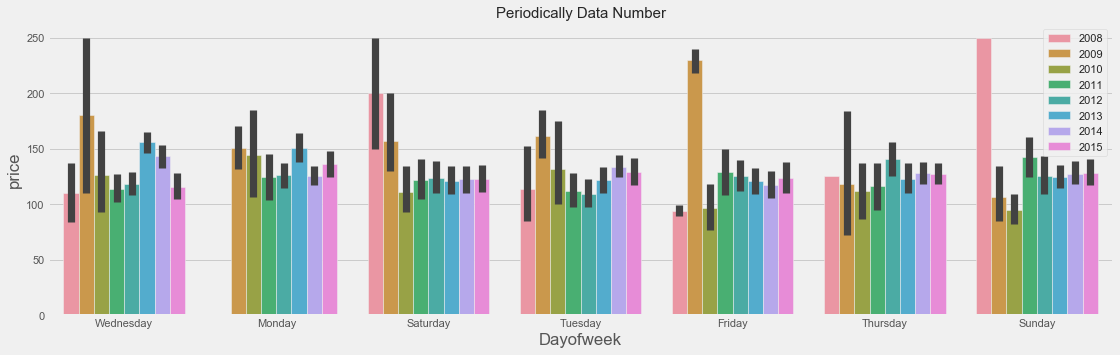

In [73]:
fig, ax = plt.subplots(figsize = (17, 5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x = "Dayofweek", y = "price", hue = 'Year', data = df_new)
a.set_title("Periodically Data Number", fontsize = 15)
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper')
plt.show()

Text(0.5, 1.0, 'Total money by price received By year')

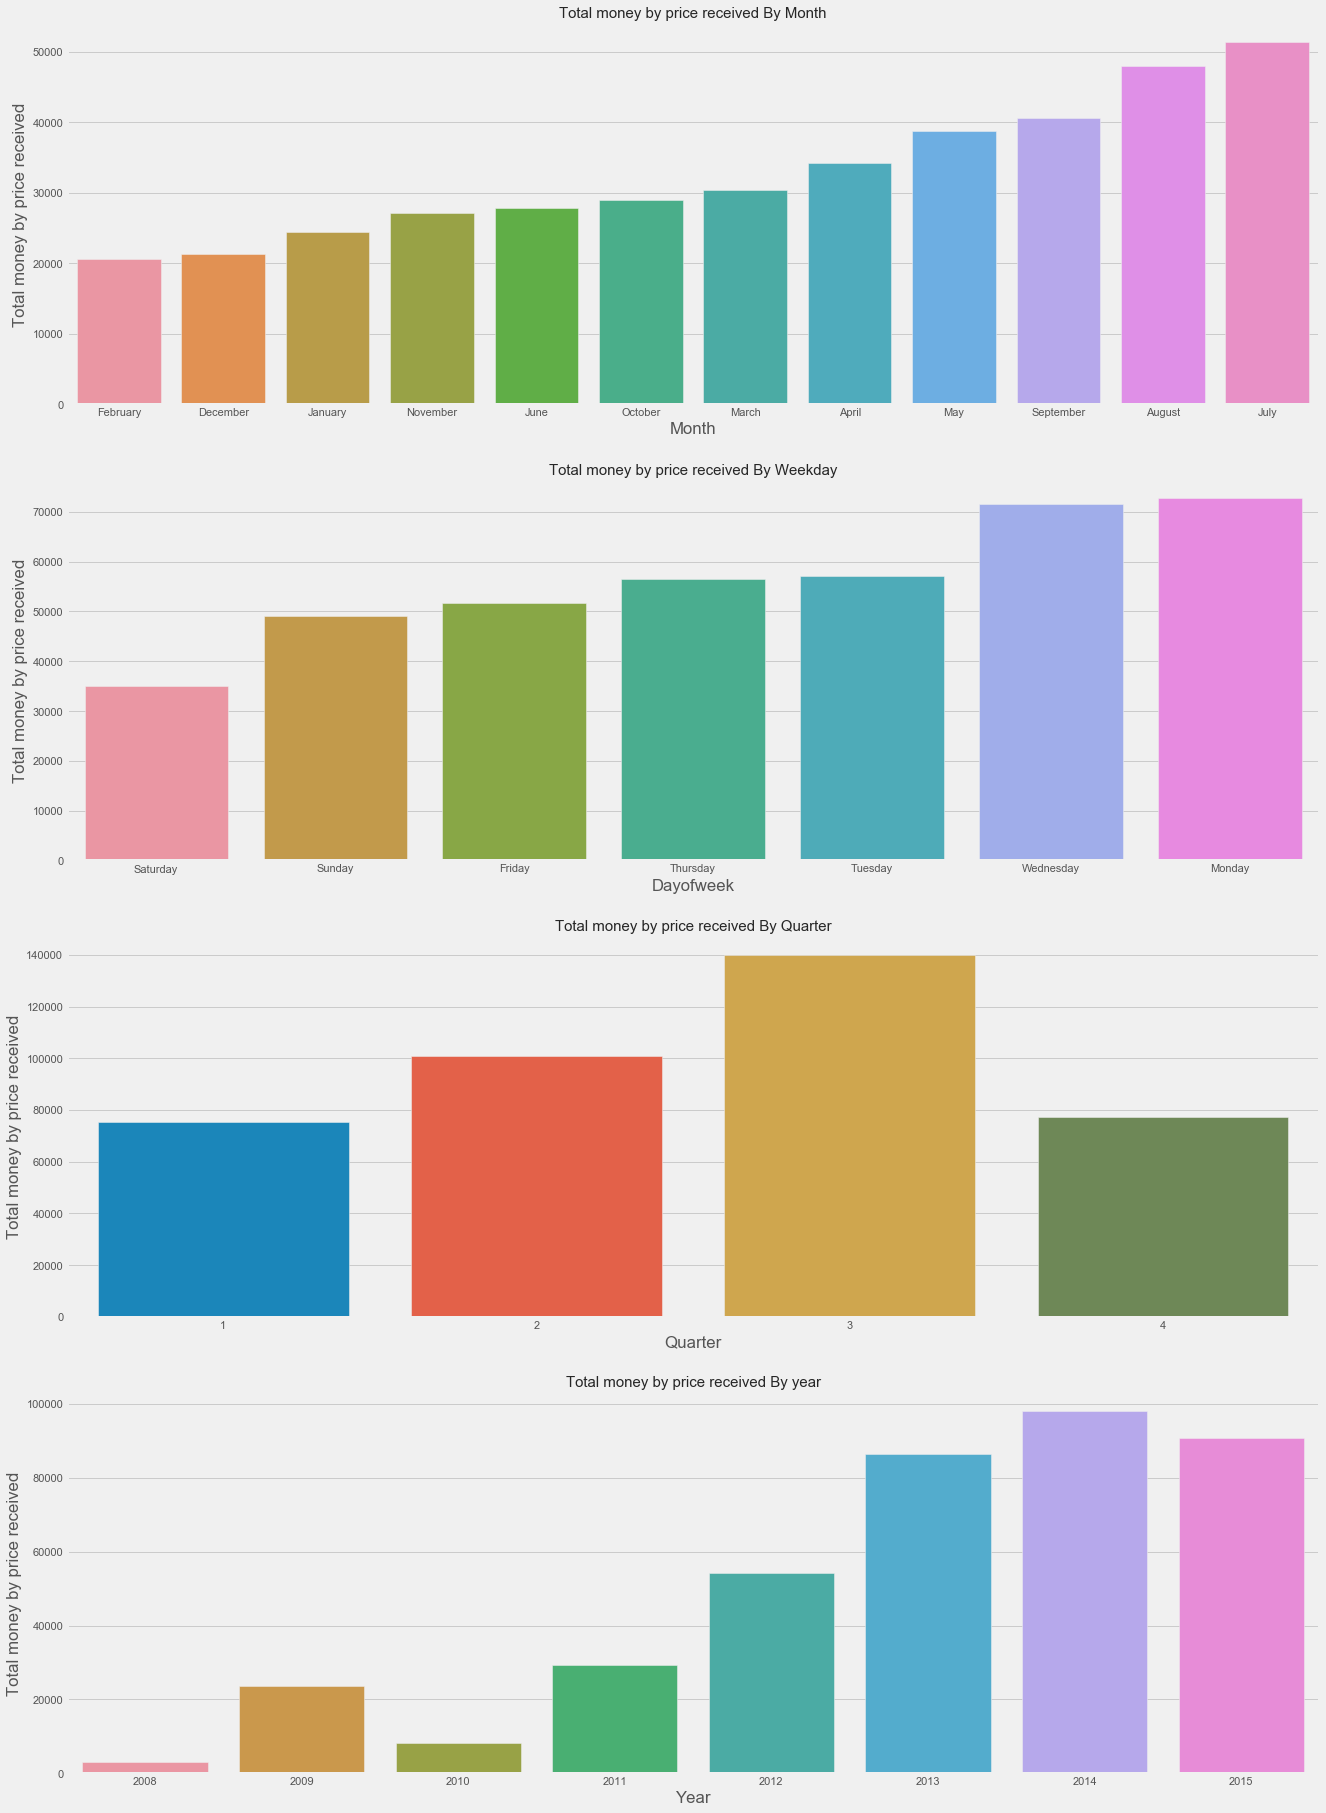

In [76]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows = 4)
fig.set_size_inches(20, 30)

monthAggregated = pd.DataFrame(df_new.groupby("Month")["price"].sum()).reset_index().sort_values('price')
sns.barplot(data = monthAggregated, x = "Month", y = "price", ax = ax1)
ax1.set(xlabel = 'Month', ylabel = 'Total money by price received')
ax1.set_title("Total money by price received By Month", fontsize = 15)

monthAggregated = pd.DataFrame(df_new.groupby("Dayofweek")["price"].sum()).reset_index().sort_values('price')
sns.barplot(data = monthAggregated, x = "Dayofweek", y = "price", ax = ax2)
ax2.set(xlabel = 'Dayofweek', ylabel = 'Total money by price received')
ax2.set_title("Total money by price received By Weekday", fontsize = 15)

monthAggregated = pd.DataFrame(df_new.groupby("Quarter")["price"].sum()).reset_index().sort_values('price')
sns.barplot(data = monthAggregated, x = "Quarter", y = "price", ax = ax3)
ax3.set(xlabel = 'Quarter', ylabel = 'Total money by price received')
ax3.set_title("Total money by price received By Quarter", fontsize = 15)

monthAggregated = pd.DataFrame(df_new.groupby("Year")["price"].sum()).reset_index().sort_values('price')
sns.barplot(data = monthAggregated, x = "Year", y = "price", ax = ax4)
ax4.set(xlabel = 'Year', ylabel = 'Total money by price received')
ax4.set_title("Total money by price received By year", fontsize = 15)

In [80]:
df_new.head()

,Dayofweek,Quarter,Month,Year,Dayofyear,Dayofmonth,Weekofyear,price
0,Wednesday,3,August,2013,226,14,33,195.0
1,Monday,1,January,2012,23,23,4,150.0
2,Saturday,4,October,2009,304,31,44,140.0
3,Tuesday,2,April,2013,113,23,17,110.0
4,Monday,3,July,2012,191,9,28,119.0


In [81]:
df = DSA.rename(columns = {'host_since':'ds', 'price':'y'})
df.head()

,ds,y
0,2013-08-14,195.0
1,2012-01-23,150.0
2,2009-10-31,140.0
3,2013-04-23,110.0
4,2012-07-09,119.0


In [91]:
X_train, X_test = train_test_split(df, test_size = 0.15, shuffle = False)

In [92]:
X_train.shape, X_test.shape

((2561, 2), (452, 2))

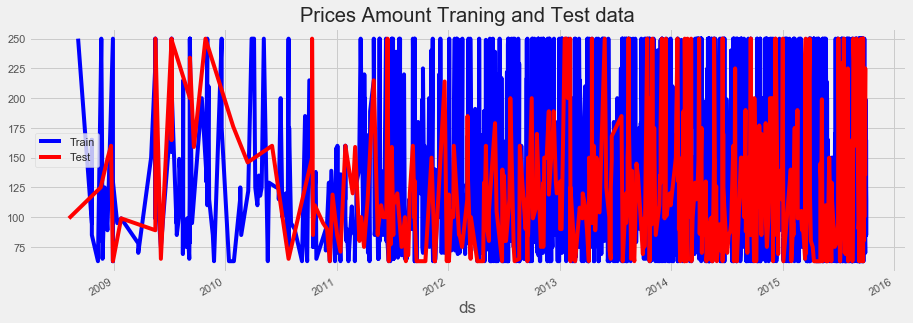

In [93]:
# без перемешивания
pd.plotting.register_matplotlib_converters()
f, ax = plt.subplots(figsize = (14, 5))
X_train.plot(kind = 'line', x = 'ds', y = 'y', color = 'blue', label = 'Train', ax = ax)
X_test.plot(kind = 'line', x = 'ds', y = 'y', color = 'red', label = 'Test', ax = ax)
plt.title('Prices Amount Traning and Test data')
plt.show()

In [94]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
model = Prophet() # changepoint_prior_scale = 0.01, , weekly_seasonality = 'auto' seasonality_mode = 'multiplicative', mcmc_samples = 30, adapt_delta = 0.85
model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future = model.make_future_dataframe(periods = 14, freq = 'W', include_history = True)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2568,2015-11-22,117.791516,39.859554,198.180129
2569,2015-11-29,117.918554,47.275168,193.230363
2570,2015-12-06,117.833481,49.295738,192.633071
2571,2015-12-13,118.675662,41.722334,193.069358
2572,2015-12-20,120.767658,45.011309,192.418383
2573,2015-12-27,122.280779,47.316475,195.717339
2574,2016-01-03,120.946100,48.364001,201.438608


In [99]:
forecast.shape, future.shape

((2575, 19), (2575, 1))

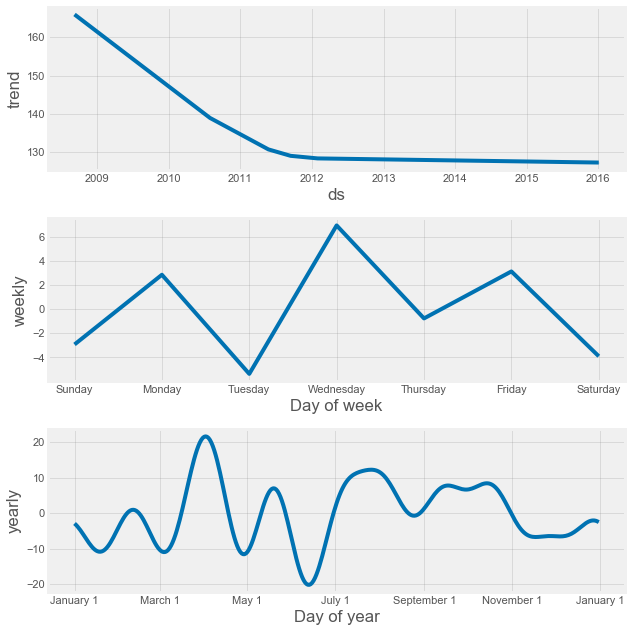

In [100]:
fig = model.plot_components(forecast)

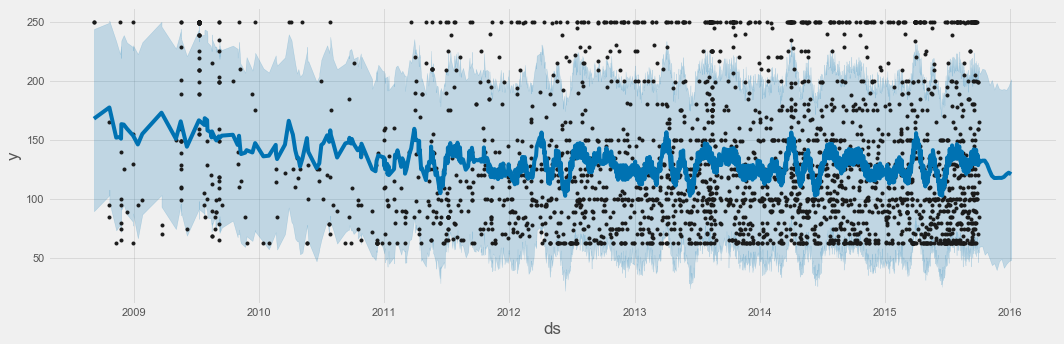

In [101]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax = ax)
plt.show()

In [102]:
X_test_forecast = model.predict(X_test)
X_test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
445,2015-09-21,137.795003,64.647811,211.674853
446,2015-09-22,129.439914,50.446712,203.557734
447,2015-09-23,141.637458,64.887275,222.705543
448,2015-09-23,141.637458,63.235272,214.409560
449,2015-09-25,137.533387,67.402525,206.670125
450,2015-09-28,136.926920,55.518175,207.042611
451,2015-09-28,136.926920,64.612998,205.002644


In [103]:
X_test_forecast.shape

(452, 19)

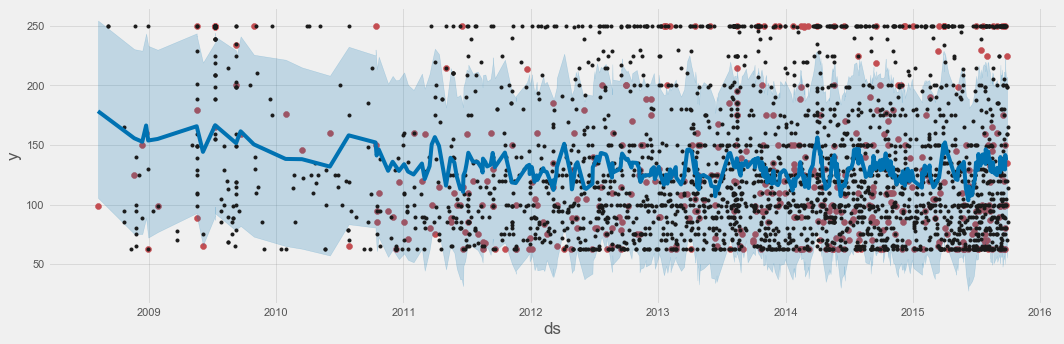

In [104]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(X_test.ds, X_test['y'], color = 'r')
fig = model.plot(X_test_forecast, ax = ax)

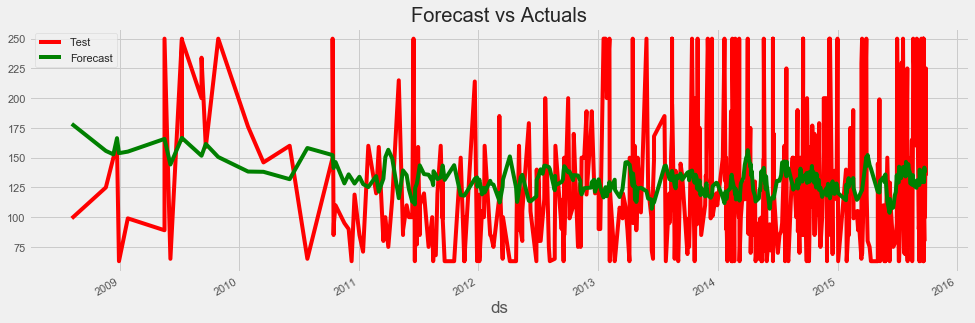

In [105]:
# Compare the test prices and forecasted prices
f, ax = plt.subplots(figsize = (14, 5))
f.set_figheight(5)
f.set_figwidth(15)
X_test.plot(kind = 'line', x = 'ds', y = 'y', color = 'red', label = 'Test', ax = ax)
X_test_forecast.plot(kind = 'line', x = 'ds', y = 'yhat', color = 'green', label = 'Forecast', ax = ax)
plt.title('Forecast vs Actuals')
plt.show()

In [106]:
mape = mean_absolute_percentage_error(X_test['y'], X_test_forecast['yhat'])
print("MAPE", round(mape, 4))

MAPE 45.1928


In [107]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode' : ('multiplicative', 'additive'),
               'freq' : ('D', 'W', 'M'),
               'changepoint_prior_scale' : [0.1, 0.2, 0.3],
              'holidays_prior_scale' : [0.1, 0.2, 0.3],
              'n_changepoints' : [100, 150, 200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt + 1

print('Total Possible Models =', cnt)

Total Possible Models = 162


In [108]:
min(df['ds']), max(df['ds'])

(Timestamp('2008-08-08 00:00:00'), Timestamp('2015-10-01 00:00:00'))

In [109]:
Actual = pd.concat([X_train['y'], X_test[:30]['y']])

In [111]:
Actual.shape

(2591,)

In [113]:
%%time

# strt = min(df['ds']) # '2019-12-31'
# end = max(df['ds']) # '2020-02-26'
model_parameters = pd.DataFrame(columns = ['MAPE', 'Parameters'])
periods = 30
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality = True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width = 0.95)
    train_model.add_country_holidays(country_name = 'UA').fit(X_train)
    
    train_forecast = train_model.make_future_dataframe(periods = periods, freq = p['freq'], include_history = True)
    train_forecast = train_model.predict(train_forecast)
    test = train_forecast[['ds', 'yhat']]
    Actual = pd.concat([X_train['y'], X_test[:periods]['y']])
    MAPE = mean_absolute_percentage_error(Actual, abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------', MAPE)
    model_parameters = model_parameters.append({'MAPE' : MAPE, 'Parameters' : p}, ignore_index = True)

{'changepoint_prior_scale': 0.1, 'freq': 'D', 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.49637502527254
{'changepoint_prior_scale': 0.1, 'freq': 'D', 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.432437962754186
{'changepoint_prior_scale': 0.1, 'freq': 'D', 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.47602782348669
{'changepoint_prior_scale': 0.1, 'freq': 'D', 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.43572907946549
{'changepoint_prior_scale': 0.1, 'freq': 'D', 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seas

Out of total 162 models, we will select the parameters which has the least MAPE to train the final model and predict the next 2 months sales of the store.

In [114]:
parameters = model_parameters.sort_values(by = ['MAPE'])
parameters = parameters.reset_index(drop = True)
parameters.head()

,MAPE,Parameters
0,44.348376,"{'changepoint_prior_scale': 0.1, 'freq': 'W', ..."
1,44.349243,"{'changepoint_prior_scale': 0.1, 'freq': 'W', ..."
2,44.351616,"{'changepoint_prior_scale': 0.1, 'freq': 'W', ..."
3,44.376839,"{'changepoint_prior_scale': 0.1, 'freq': 'M', ..."
4,44.377194,"{'changepoint_prior_scale': 0.1, 'freq': 'M', ..."


In [115]:
parameters['Parameters'][0] # optimal model

{'changepoint_prior_scale': 0.1,
 'freq': 'W',
 'holidays_prior_scale': 0.1,
 'n_changepoints': 100,
 'seasonality_mode': 'additive'}

In [116]:
final_model = Prophet(changepoint_prior_scale = 0.1,
                      holidays_prior_scale = 0.1,
                      n_changepoints = 100,
                      seasonality_mode = 'additive',
                      weekly_seasonality = True,
                      daily_seasonality = False,
                      yearly_seasonality = False,
                      interval_width = 0.95)
final_model.add_country_holidays(country_name = 'UA')
final_model.fit(X_train)

In [117]:
future = final_model.make_future_dataframe(periods = 30, freq = 'W')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2584,2016-03-13,123.836909,-0.159110,235.297135
2585,2016-03-20,123.806338,9.785046,248.375833
2586,2016-03-27,123.775766,9.641306,233.009199
2587,2016-04-03,123.745195,9.435473,245.209808
2588,2016-04-10,123.714624,14.932552,242.535858
2589,2016-04-17,123.684053,5.529863,246.886285
2590,2016-04-24,123.653482,4.598053,229.043309


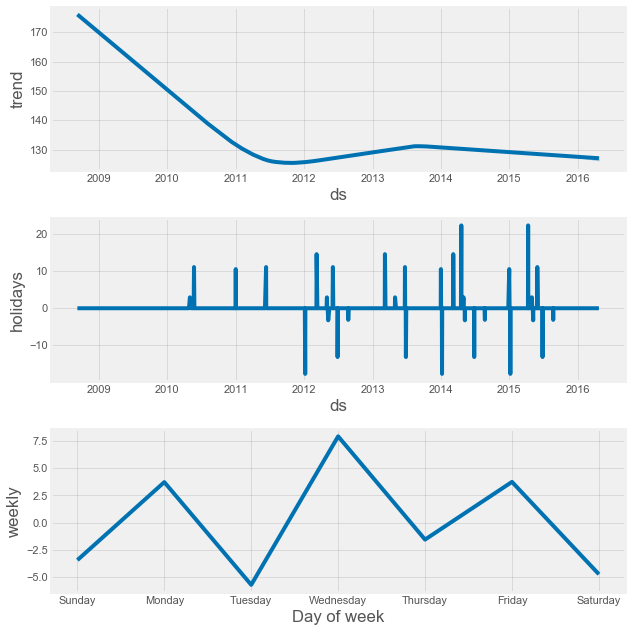

In [118]:
fig = final_model.plot_components(forecast)

In [124]:
# , , index_col = 'host_since'
df_out = pd.read_csv('c:/Users/Professor/Downloads/Submission.csv', sep = ',', error_bad_lines = False, parse_dates = ['host_since'])

In [125]:
df_out.head(3)

,name,summary,description,neighborhood_overview,transit,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,Top Location 1 block to Capitol,Location is unbeatable. One block to US Capi...,Location is unbeatable. One block to US Capi...,Outstanding security. Charming historic villa...,NaN,2013-11-27,Austin / DC / Cape Cod,Long time provider of furnished housing. W...,98%,79%,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,5,1.00
1,Charming Basement Apartment in DC,This fully furnished basement apartment can be...,This fully furnished basement apartment can be...,"Diverse neighborhood, steps from bars, restaur...","Metro is a 5 min walk, as well as direct bus ...",2015-04-05,"Washington, District of Columbia, United States","Hey there! New to the airbnb community, living...",89%,33%,...,10.0,10.0,10.0,10.0,9.0,9.0,f,flexible,1,0.36
2,Cozy Apartment to Explore DC,"Convenient, newly renovated 1 bedroom/1 bathro...","Convenient, newly renovated 1 bedroom/1 bathro...",Petworth is an interesting and historic DC nei...,We have a number of bus and train lines within...,2013-05-22,"Washington, District of Columbia, United States","I am a doctoral student in Washington, DC. I ...",100%,91%,...,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,1,4.00


In [132]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,Різдво Христове (православне),Різдво Христове (православне)_lower,Різдво Христове (православне)_upper,Трійця,Трійця_lower,Трійця_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-09-07,176.048766,56.023116,291.748911,176.048766,176.048766,-3.421358,-3.421358,-3.421358,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.627408
1,2008-09-07,176.048766,62.341008,283.074689,176.048766,176.048766,-3.421358,-3.421358,-3.421358,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.627408
2,2008-10-22,173.646223,51.794442,287.436275,173.646223,173.646223,7.909202,7.909202,7.909202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.555425


In [139]:
df_out.columns;

In [154]:
df_out = df_out.sort_values(by = ['host_since'])

In [159]:
df_out.sort_values(by = ['host_since']);

In [169]:
df_out.shape, forecast.shape

((618, 44), (2591, 49))

In [173]:
result = forecast.loc[forecast.ds >= min(df_out['host_since'])].head(len(df_out))

In [174]:
result.shape

(618, 49)

In [127]:
min(df_out['host_since'].dt.year), max(df_out['host_since'].dt.year)

(2008, 2015)

In [128]:
min(df_out['host_since']), max(df_out['host_since'])

(Timestamp('2008-09-07 00:00:00'), Timestamp('2015-09-28 00:00:00'))

In [129]:
min(forecast['ds']), max(forecast['ds'])

(Timestamp('2008-09-07 00:00:00'), Timestamp('2016-04-24 00:00:00'))

In [175]:
df_out.index = result.index

In [176]:
df_out['price_prediction'] = forecast['yhat']

In [179]:
df_out.to_csv(r'c:/Users/Professor/Downloads/Submission.csv', index = False, header = True)

In [184]:
! git remote add test_2 https://github.com/s-kav/Test_2

In [185]:
! git remote -v

test_2	https://github.com/s-kav/Test_2 (fetch)
test_2	https://github.com/s-kav/Test_2 (push)
upstream	https://github.com/jtleek/datasharing.git (fetch)
upstream	https://github.com/jtleek/datasharing.git (push)


In [187]:
! git push Submission.csv https://github.com/s-kav/Test_2

fatal: invalid refspec 'https://github.com/s-kav/Test_2'
